In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generalization
## Logic Definition of Generalization:
1. Show empirically that the information limit of 2 prediction bits per parameter also holds for nearest neighbors.

In [8]:
data = pd.read_csv("titanic.csv")
data = data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data = data.dropna()

X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def plotNN(n_neighbors):
    k_values = range(1, n_neighbors + 1)
    prediction_bits_per_param = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        n_samples = X_train.shape[0]
        n_params = X_train.shape[1] * k
        prediction_bits = n_samples * accuracy
        bits_per_param = prediction_bits / n_params

        prediction_bits_per_param.append(bits_per_param)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, prediction_bits_per_param, marker="o")
    plt.axhline(y=0, color="r", linestyle="--", label="Information Limit (2 bits/param)")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Prediction Bits per Parameter")
    plt.title("Empirical Demonstration of Information Limit for Nearest Neighbors")
    plt.legend()
    plt.tight_layout()
    plt.show()

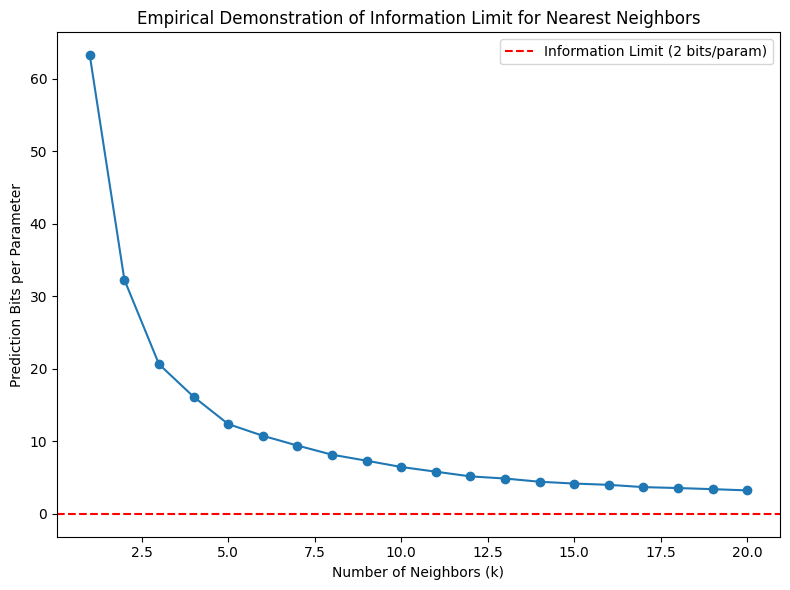

In [9]:
plotNN(20)